### Average Precision for test data

#### Import data

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = "{:,.4f}".format

In [2]:
final_dir = "/scratch/jag2j/final_data/"

In [3]:
os.chdir(final_dir)
os.listdir()

['unknown2_result_cosine_wgt.csv',
 'test_entities_P31_1000.csv',
 'result_cosine_10plus.csv',
 '279-train_freq_matrix.csv',
 '31-train_freq_matrix_10plus.csv',
 '31-test-types_10plus.csv',
 'unknown2_result_innerproduct.csv',
 'result_pen_inner_prod_10plus.csv',
 'result_cosine.csv',
 'result_cosine_wgt_10plus.csv',
 '31-test-types.csv',
 'unknown2_result_jaccard.csv',
 'result_jaccard_wgt.csv',
 'test_unknown_P31_10.csv',
 'unknown2_result_pen_inner_prod_wgt.csv',
 'unknown2_result_jaccard_wgt.csv',
 'result_innerproduct_wgt_10plus.csv',
 'result_manhattan_wgt.csv',
 'result_innerproduct_wgt.csv',
 'result_innerproduct_10plus.csv',
 'result_jaccard_10plus.csv',
 'result_manhattan_wgt_10plus.csv',
 'result_jaccard.csv',
 'unknown_results',
 'unknown2_result_innerproduct_wgt.csv',
 'result_cosine_wgt.csv',
 'unknown2_result_manhattan_wgt.csv',
 'result_pen_inner_prod.csv',
 'unknown2_result_cosine.csv',
 'result_manhattan_10plus.csv',
 'result_manhattan.csv',
 'aux',
 'result_pen_inner

In [4]:
result_list = glob.glob('result*.csv')
result_list

['result_cosine_10plus.csv',
 'result_pen_inner_prod_10plus.csv',
 'result_cosine.csv',
 'result_cosine_wgt_10plus.csv',
 'result_jaccard_wgt.csv',
 'result_innerproduct_wgt_10plus.csv',
 'result_manhattan_wgt.csv',
 'result_innerproduct_wgt.csv',
 'result_innerproduct_10plus.csv',
 'result_jaccard_10plus.csv',
 'result_manhattan_wgt_10plus.csv',
 'result_jaccard.csv',
 'result_cosine_wgt.csv',
 'result_pen_inner_prod.csv',
 'result_manhattan_10plus.csv',
 'result_manhattan.csv',
 'result_pen_inner_prod_wgt.csv',
 'result_jaccard_wgt_10plus.csv',
 'result_pen_inner_prod_wgt_10plus.csv',
 'result_innerproduct.csv']

In [5]:
cosine_10plus = pd.read_csv(result_list[0]).groupby('entity')['type'].unique().apply(pd.Series)
pen_inner_prod_10plus = pd.read_csv(result_list[1]).groupby('entity')['type'].unique().apply(pd.Series)
cosine = pd.read_csv(result_list[2]).groupby('entity')['type'].unique().apply(pd.Series)
cosine_wgt_10plus = pd.read_csv(result_list[3]).groupby('entity')['type'].unique().apply(pd.Series)
jaccard_wgt = pd.read_csv(result_list[4]).groupby('entity')['type'].unique().apply(pd.Series)
innerproduct_wgt_10plus = pd.read_csv(result_list[5]).groupby('entity')['type'].unique().apply(pd.Series)
manhattan_wgt = pd.read_csv(result_list[6]).groupby('entity')['type'].unique().apply(pd.Series)
innerproduct_wgt = pd.read_csv(result_list[7]).groupby('entity')['type'].unique().apply(pd.Series)
innerproduct_10plus = pd.read_csv(result_list[8]).groupby('entity')['type'].unique().apply(pd.Series)
jaccard_10plus = pd.read_csv(result_list[9]).groupby('entity')['type'].unique().apply(pd.Series)
manhattan_wgt_10plus = pd.read_csv(result_list[10]).groupby('entity')['type'].unique().apply(pd.Series)
jaccard = pd.read_csv(result_list[11]).groupby('entity')['type'].unique().apply(pd.Series)
cosine_wgt = pd.read_csv(result_list[12]).groupby('entity')['type'].unique().apply(pd.Series)
pen_inner_prod = pd.read_csv(result_list[13]).groupby('entity')['type'].unique().apply(pd.Series)
manhattan_10plus = pd.read_csv(result_list[14]).groupby('entity')['type'].unique().apply(pd.Series)
manhattan = pd.read_csv(result_list[15]).groupby('entity')['type'].unique().apply(pd.Series)
pen_inner_prod_wgt = pd.read_csv(result_list[16]).groupby('entity')['type'].unique().apply(pd.Series)
jaccard_wgt_10plus = pd.read_csv(result_list[17]).groupby('entity')['type'].unique().apply(pd.Series)
pen_inner_prod_wgt_10plus = pd.read_csv(result_list[18]).groupby('entity')['type'].unique().apply(pd.Series)
innerproduct = pd.read_csv(result_list[19]).groupby('entity')['type'].unique().apply(pd.Series)

In [6]:
# True types dataframe
true_type_10 = pd.read_csv('31-test-types_10plus.csv').rename({'type':'true_type'}, axis=1)#.set_index('entity')
true_type_10.head()

,entity,true_type
0,7795,484652
1,7795,431603
2,7795,245065
3,43789,5
4,89050,5


In [7]:
# True types dataframe
true_type = pd.read_csv('31-test-types.csv').rename({'type':'true_type'}, axis=1)#.set_index('entity')
true_type.head()

,entity,true_type
0,34786,34770
1,34786,1288568
2,4348159,24333627
3,4690173,41710
4,5171337,16521


In [8]:
true_type_10 = true_type_10.groupby('entity')['true_type'].unique().apply(pd.Series)
true_type_10

,0,1,2,3,4,5,6,7
entity,,,,,,,,
7795,"484,652.0000","431,603.0000","245,065.0000",nan,nan,nan,nan,nan
43789,5.0000,nan,nan,nan,nan,nan,nan,nan
49784,5.0000,nan,nan,nan,nan,nan,nan,nan
70282,5.0000,nan,nan,nan,nan,nan,nan,nan
89050,5.0000,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
97968349,"452,237.0000",nan,nan,nan,nan,nan,nan,nan
97974214,"452,237.0000",nan,nan,nan,nan,nan,nan,nan
97997414,"452,237.0000",nan,nan,nan,nan,nan,nan,nan


In [9]:
true_type = true_type.groupby('entity')['true_type'].unique().apply(pd.Series)
true_type

,0,1,2,3
entity,,,,
8042,"3,199,141.0000","1,549,591.0000",nan,nan
33198,"4,162,444.0000",nan,nan,nan
34786,"34,770.0000","1,288,568.0000",nan,nan
123501,5.0000,nan,nan,nan
211464,"4,830,453.0000","6,881,511.0000",nan,nan
...,...,...,...,...
98584153,"736,691.0000",nan,nan,nan
99307642,"13,442,814.0000",nan,nan,nan
99507795,"64,063,386.0000",nan,nan,nan


In [10]:
def get_avg_precision(entity_df, validation_df, n):
    """Gets the average precision.

    Keyword arguments:
    entity_df: Enter an scored entity to super entity dataframe
    validation_df: Enter the true entity to super entity dataframe
    n: Enter the number of super entity suggestions you are considering
    """

    precision_dict = {}
    for entity in entity_df.iterrows():
        ent_index = entity[0]
        ent_list = list(entity[1].values)
        precision = 0
        count = 0
        for i in range(n):
            if ent_list[i] in validation_df.loc[ent_index].values:
                count += 1
                precision += count / (i + 1)
            else:
                pass
        if count == 0:
            avg_precision = np.nan
        else:
            avg_precision = precision / count
        precision_dict[ent_index] = avg_precision
    return precision_dict


## 10 plus property test dataset

### Cosine 10 plus

In [11]:
avgp_cosine_10 = pd.Series(get_avg_precision(cosine_10plus, true_type_10, 10), name='avg_p').to_frame()

In [12]:
avgp_cosine_10.mean()

avg_p   0.3048
dtype: float64

In [13]:
avgp_cosine_10.fillna(0).mean()

avg_p   0.0808
dtype: float64

### Penalized Inner Product 10 plus

In [14]:
avgp_pip_10 = pd.Series(get_avg_precision(pen_inner_prod_10plus, true_type_10, 10), name='avg_p').to_frame()

In [15]:
avgp_pip_10.mean()

avg_p   0.2624
dtype: float64

In [16]:
avgp_pip_10.fillna(0).mean()

avg_p   0.0903
dtype: float64

### Cosine w/ weights 10 plus

In [17]:
avgp_cosine_wgt_10 = pd.Series(get_avg_precision(cosine_wgt_10plus, true_type_10, 10), name='avg_p').to_frame()

In [18]:
avgp_cosine_wgt_10.mean()

avg_p   0.9777
dtype: float64

In [19]:
avgp_cosine_wgt_10.fillna(0).mean()

avg_p   0.9572
dtype: float64

### Inner Product w/ weights 10 plus

In [20]:
avgp_ip_wgt_10 = pd.Series(get_avg_precision(innerproduct_wgt_10plus, true_type_10, 10), name='avg_p').to_frame()

In [21]:
avgp_ip_wgt_10.mean()

avg_p   0.9714
dtype: float64

In [22]:
avgp_ip_wgt_10.fillna(0).mean()

avg_p   0.9510
dtype: float64

### Inner Product 10 plus

In [23]:
avgp_ip_10 = pd.Series(get_avg_precision(innerproduct_10plus, true_type_10, 10), name='avg_p').to_frame()

In [24]:
avgp_ip_10.mean()

avg_p   0.3230
dtype: float64

In [25]:
avgp_ip_10.fillna(0).mean()

avg_p   0.0252
dtype: float64

### Jaccard 10 plus

In [26]:
avgp_jacc_10 = pd.Series(get_avg_precision(jaccard_10plus, true_type_10, 10), name='avg_p').to_frame()

In [27]:
avgp_jacc_10.mean()

avg_p   0.6125
dtype: float64

In [28]:
avgp_jacc_10.fillna(0).mean()

avg_p   0.0025
dtype: float64

### Manhattan w/ weights 10 plus

In [29]:
avgp_manh_wgt_10 = pd.Series(get_avg_precision(manhattan_wgt_10plus, true_type_10, 10), name='avg_p').to_frame()

In [30]:
avgp_manh_wgt_10.mean()

avg_p   nan
dtype: float64

In [31]:
avgp_manh_wgt_10.fillna(0).mean()

avg_p   0.0000
dtype: float64

### Manhattan 10 plus

In [32]:
avgp_manh_10 = pd.Series(get_avg_precision(manhattan_10plus, true_type_10, 10), name='avg_p').to_frame()

In [33]:
avgp_manh_10.mean()

avg_p   nan
dtype: float64

In [34]:
avgp_manh_10.fillna(0).mean()

avg_p   0.0000
dtype: float64

### Jaccard w/ weights 10 plus

In [35]:
avgp_jacc_wgt_10 = pd.Series(get_avg_precision(jaccard_wgt_10plus, true_type_10, 10), name='avg_p').to_frame()

In [36]:
avgp_jacc_wgt_10.mean()

avg_p   0.4986
dtype: float64

In [37]:
avgp_jacc_wgt_10.fillna(0).mean()

avg_p   0.0199
dtype: float64

### Penalized Inner Product w/ weights 10 plus

In [38]:
avgp_pip_wgt_10 = pd.Series(get_avg_precision(pen_inner_prod_wgt_10plus, true_type_10, 10), name='avg_p').to_frame()

In [39]:
avgp_pip_wgt_10.mean()

avg_p   0.9678
dtype: float64

In [40]:
avgp_pip_wgt_10.fillna(0).mean()

avg_p   0.9455
dtype: float64

In [41]:
avgp_pip_wgt_10.mean()[0]

0.9677917499309524

### Overall Scores

In [42]:
pd.DataFrame(np.array(['cosine', avgp_cosine_10.mean()[0], avgp_cosine_10.fillna(0).mean()[0],
                       'pen_inner_prod', avgp_pip_10.mean()[0], avgp_pip_10.fillna(0).mean()[0],
                       'cosine_wgt', avgp_cosine_wgt_10.mean()[0], avgp_cosine_wgt_10.fillna(0).mean()[0],
                       'innerprod_wgt', avgp_ip_wgt_10.mean()[0], avgp_ip_wgt_10.fillna(0).mean()[0],
                       'innerproduct', avgp_ip_10.mean()[0], avgp_ip_10.fillna(0).mean()[0],
                       'jaccard', avgp_jacc_10.mean()[0], avgp_jacc_10.fillna(0).mean()[0],
                       'manhattan_wgt', avgp_manh_wgt_10.mean()[0], avgp_manh_wgt_10.fillna(0).mean()[0],
                       'manhattan', avgp_manh_10.mean()[0], avgp_manh_10.fillna(0).mean()[0],          
                       'jaccard_wgt', avgp_jacc_wgt_10.mean()[0], avgp_jacc_wgt_10.fillna(0).mean()[0],
                       'pen_inner_prod_wgt', avgp_pip_wgt_10.mean()[0], avgp_pip_wgt_10.fillna(0).mean()[0]
                      ]).reshape(10,3), columns=['scoring','MAP1','MAP2']).set_index('scoring')

,MAP1,MAP2
scoring,,
cosine,0.30483827493261484,0.08078214285714293
pen_inner_prod,0.2623731081579919,0.09025634920634923
cosine_wgt,0.9777457561165434,0.9572130952380958
innerprod_wgt,0.9713933070674647,0.9509940476190479
innerproduct,0.3230311355311352,0.025196428571428547
jaccard,0.6125,0.0024500000000000004
manhattan_wgt,nan,0.0
manhattan,nan,0.0
jaccard_wgt,0.498640873015873,0.01994563492063492


## Any property count test dataset

### Cosine

In [43]:
avgp_cosine = pd.Series(get_avg_precision(cosine, true_type, 10), name='avg_p').to_frame()

In [44]:
avgp_cosine.mean()

avg_p   0.4566
dtype: float64

In [45]:
avgp_cosine.fillna(0).mean()

avg_p   0.0644
dtype: float64

### Jaccard w/ weights

In [46]:
avgp_jacc_wgt = pd.Series(get_avg_precision(jaccard_wgt, true_type, 10), name='avg_p').to_frame()

In [47]:
avgp_jacc_wgt.mean()

avg_p   0.3250
dtype: float64

In [48]:
avgp_jacc_wgt.fillna(0).mean()

avg_p   0.0094
dtype: float64

### Manhattan w/ weights

In [49]:
avgp_manh_wgt = pd.Series(get_avg_precision(manhattan_wgt, true_type, 10), name='avg_p').to_frame()

In [50]:
avgp_manh_wgt.mean()

avg_p   nan
dtype: float64

In [51]:
avgp_manh_wgt.fillna(0).mean()

avg_p   0.0000
dtype: float64

### Inner Product w/ weights

In [52]:
avgp_ip_wgt = pd.Series(get_avg_precision(innerproduct_wgt, true_type, 10), name='avg_p').to_frame()

In [53]:
avgp_ip_wgt.mean()

avg_p   0.8305
dtype: float64

In [54]:
avgp_ip_wgt.fillna(0).mean()

avg_p   0.7134
dtype: float64

### Jaccard

In [55]:
avgp_jacc = pd.Series(get_avg_precision(jaccard, true_type, 10), name='avg_p').to_frame()

In [56]:
avgp_jacc.mean()

avg_p   0.3420
dtype: float64

In [57]:
avgp_jacc.fillna(0).mean()

avg_p   0.0014
dtype: float64

### Cosine w/ weights

In [58]:
avgp_cosine_wgt = pd.Series(get_avg_precision(cosine_wgt, true_type, 10), name='avg_p').to_frame()

In [59]:
avgp_cosine_wgt.mean()

avg_p   0.8675
dtype: float64

In [60]:
avgp_cosine_wgt.fillna(0).mean()

avg_p   0.7582
dtype: float64

### Penalized Inner Product 

In [61]:
avgp_pip = pd.Series(get_avg_precision(pen_inner_prod, true_type, 10), name='avg_p').to_frame()

In [62]:
avgp_pip.mean()

avg_p   0.4051
dtype: float64

In [63]:
avgp_pip.fillna(0).mean()

avg_p   0.0523
dtype: float64

### Manhattan

In [64]:
avgp_manh = pd.Series(get_avg_precision(manhattan, true_type, 10), name='avg_p').to_frame()

In [65]:
avgp_manh.mean()

avg_p   nan
dtype: float64

In [66]:
avgp_manh.fillna(0).mean()

avg_p   0.0000
dtype: float64

### Penalized Inner Product w/ weights

In [67]:
avgp_pip_wgt = pd.Series(get_avg_precision(pen_inner_prod_wgt, true_type, 10), name='avg_p').to_frame()

In [68]:
avgp_pip_wgt.mean()

avg_p   0.8610
dtype: float64

In [69]:
avgp_pip_wgt.fillna(0).mean()

avg_p   0.6544
dtype: float64

### Inner Product

In [70]:
avgp_ip = pd.Series(get_avg_precision(innerproduct, true_type, 10), name='avg_p').to_frame()

In [71]:
avgp_ip.mean()

avg_p   0.3007
dtype: float64

In [72]:
avgp_ip.fillna(0).mean()

avg_p   0.0168
dtype: float64

### Overall Scores

In [73]:
pd.DataFrame(np.array(['cosine', avgp_cosine.mean()[0], avgp_cosine.fillna(0).mean()[0],
                       'pen_inner_prod', avgp_pip.mean()[0], avgp_pip.fillna(0).mean()[0],
                       'cosine_wgt', avgp_cosine_wgt.mean()[0], avgp_cosine_wgt.fillna(0).mean()[0],
                       'innerprod_wgt', avgp_ip_wgt.mean()[0], avgp_ip_wgt.fillna(0).mean()[0],
                       'innerproduct', avgp_ip.mean()[0], avgp_ip.fillna(0).mean()[0],
                       'jaccard', avgp_jacc.mean()[0], avgp_jacc.fillna(0).mean()[0],
                       'manhattan_wgt', avgp_manh_wgt.mean()[0], avgp_manh_wgt.fillna(0).mean()[0],
                       'manhattan', avgp_manh.mean()[0], avgp_manh.fillna(0).mean()[0],          
                       'jaccard_wgt', avgp_jacc_wgt.mean()[0], avgp_jacc_wgt.fillna(0).mean()[0],
                       'pen_inner_prod_wgt', avgp_pip_wgt.mean()[0], avgp_pip_wgt.fillna(0).mean()[0]
                      ]).reshape(10,3), columns=['scoring','MAP1','MAP2']).set_index('scoring')

,MAP1,MAP2
scoring,,
cosine,0.4566390858944052,0.06438611111111113
pen_inner_prod,0.40510951150486063,0.05225912698412702
cosine_wgt,0.8674566851912399,0.7581571428571436
innerprod_wgt,0.8305056636546748,0.7134043650793657
innerproduct,0.30069444444444454,0.016838888888888896
jaccard,0.3419642857142857,0.0013678571428571429
manhattan_wgt,nan,0.0
manhattan,nan,0.0
jaccard_wgt,0.3250136836343731,0.009425396825396821


### Plot the Average Precision vs Property Count

#### Import data

In [74]:
gav_dir = '/sfs/lustre/bahamut/scratch/gtw4vx/'
os.chdir(gav_dir)

In [75]:
os.listdir()

['.ipynb_checkpoints',
 'uva_seal.png',
 '01. SparkGettingStarted-fin.ipynb',
 '00. MapReduce Framework-fin.ipynb',
 'ent_prop-result.csv',
 'Untitled.ipynb',
 'archive_wiki_db',
 'wikidata_database',
 '.sfs_old_files',
 'Untitled Folder',
 'ent10_prop-result.csv']

In [76]:
ep_count = pd.read_csv('ent_prop-result.csv').set_index('entity')
ep_count_10plus = pd.read_csv('ent10_prop-result.csv').set_index('entity')

In [77]:
ep_count.head()

,count
entity,
42439714,11
42743540,3
45285204,2
28695729,1
72729472,2


In [78]:
ep_count_10plus.head()

,count
entity,
2723552,22
4221945,10
37144419,23
53638750,16
34107551,26


## 10 plus property test dataset

### Cosine 10 plus

In [79]:
cosine10_meanp = avgp_cosine_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

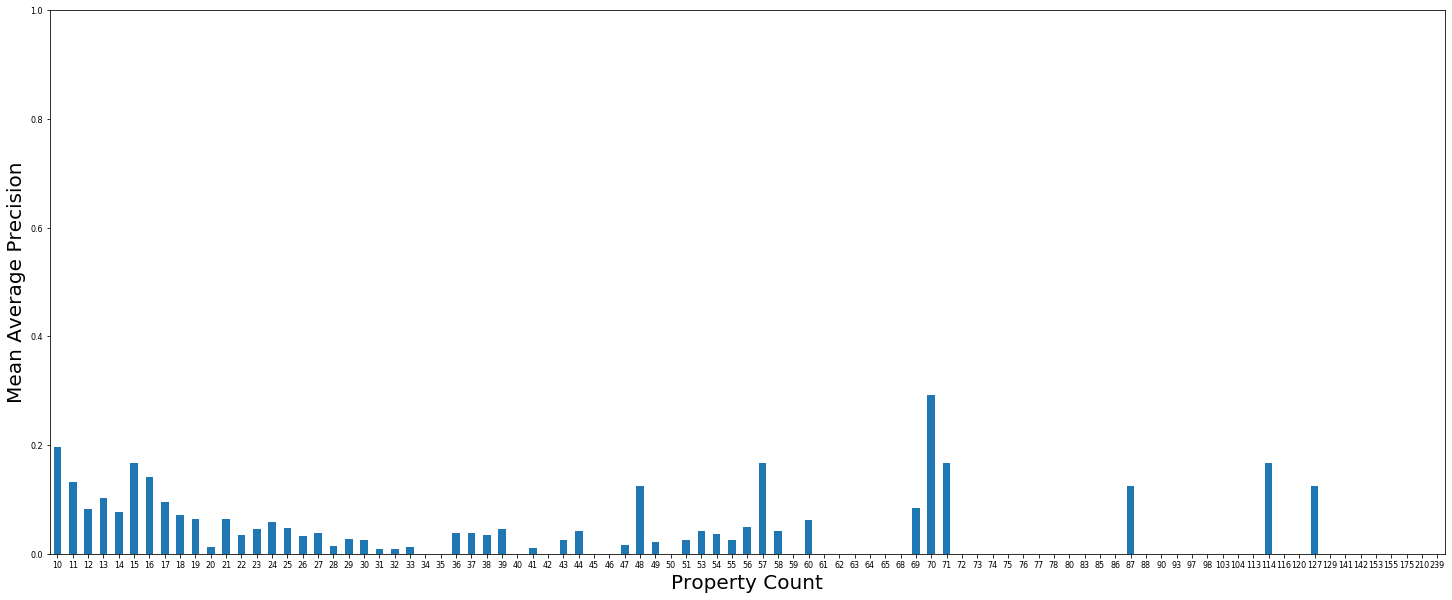

In [80]:
plt.figure(figsize=(25,10))
cosine10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Penalized Inner Product 10 plus

In [81]:
pip10_meanp = avgp_pip_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

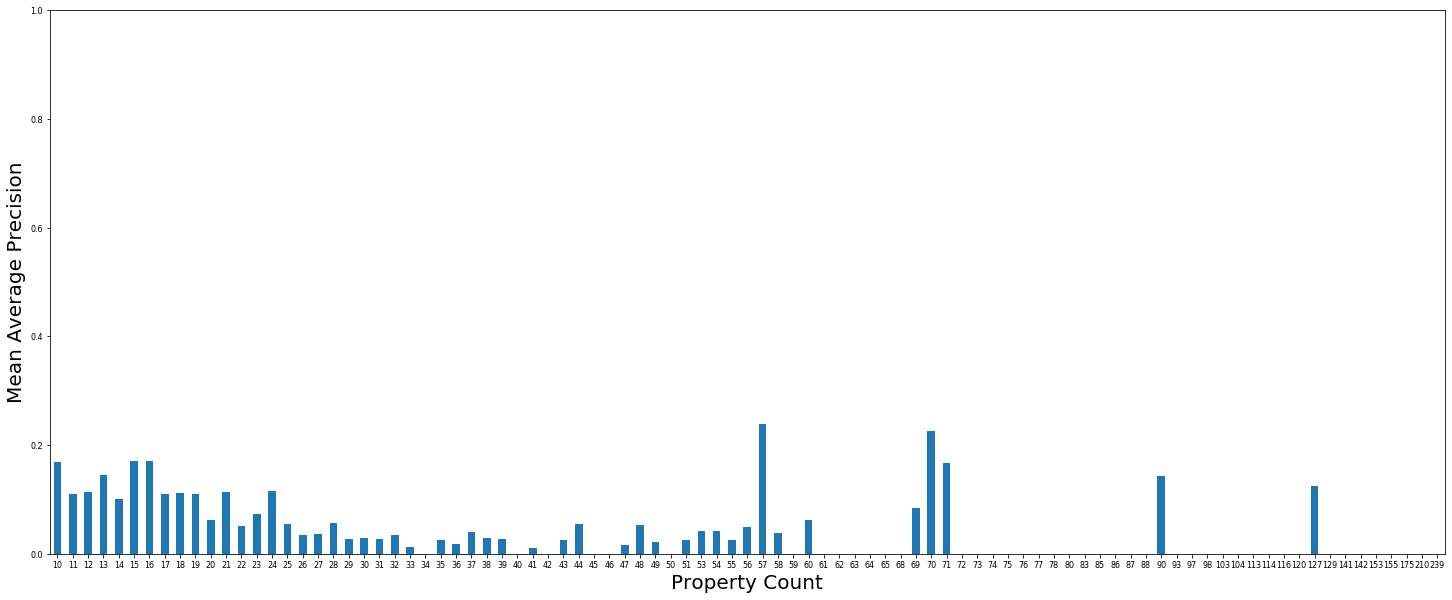

In [82]:
plt.figure(figsize=(25,10))
pip10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Cosine w/ weights 10 plus

In [83]:
cosine_wgt10_meanp = avgp_cosine_wgt_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

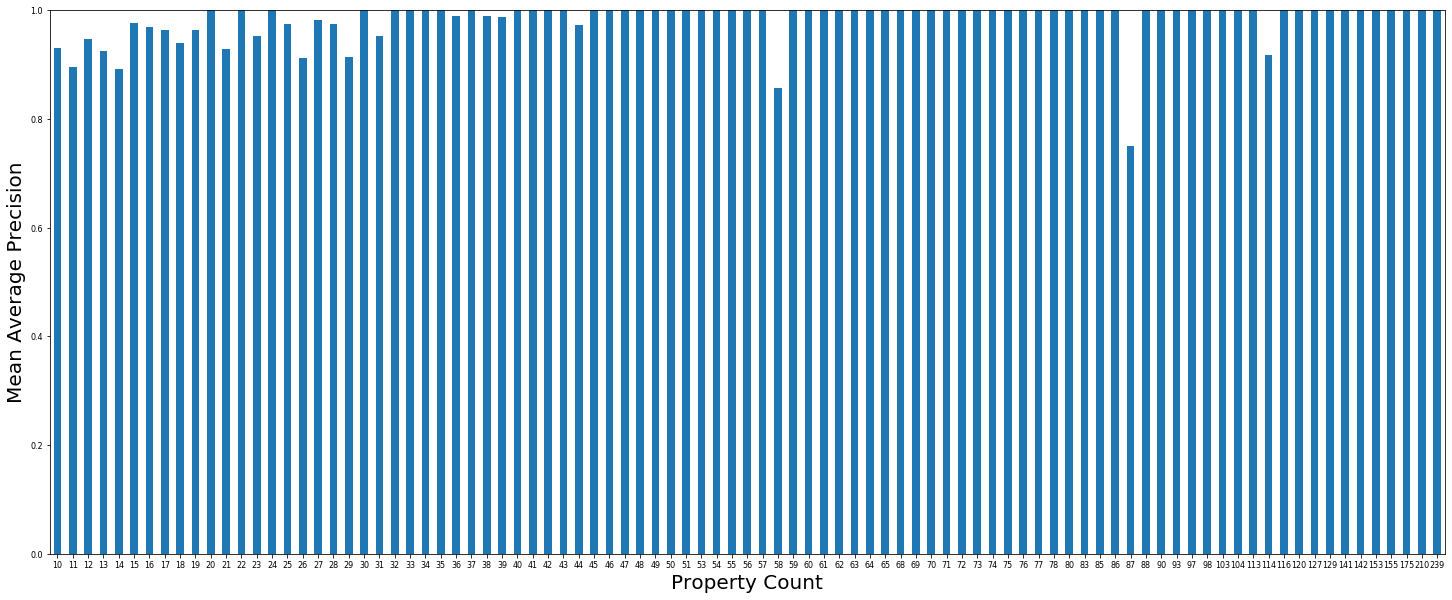

In [84]:
plt.figure(figsize=(25,10))
cosine_wgt10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Inner Product w/ weights 10 plus

In [85]:
ip_wgt10_meanp = avgp_ip_wgt_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

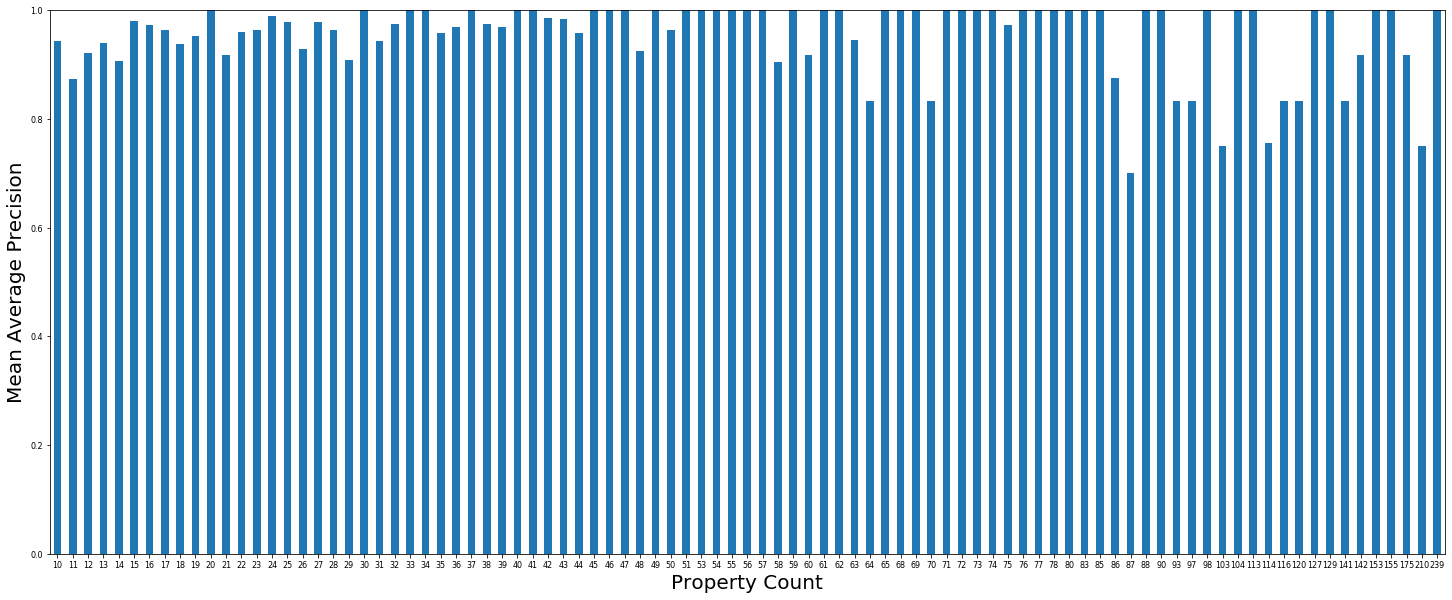

In [86]:
plt.figure(figsize=(25,10))
ip_wgt10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Inner Product 10 plus

In [87]:
ip10_meanp = avgp_ip_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

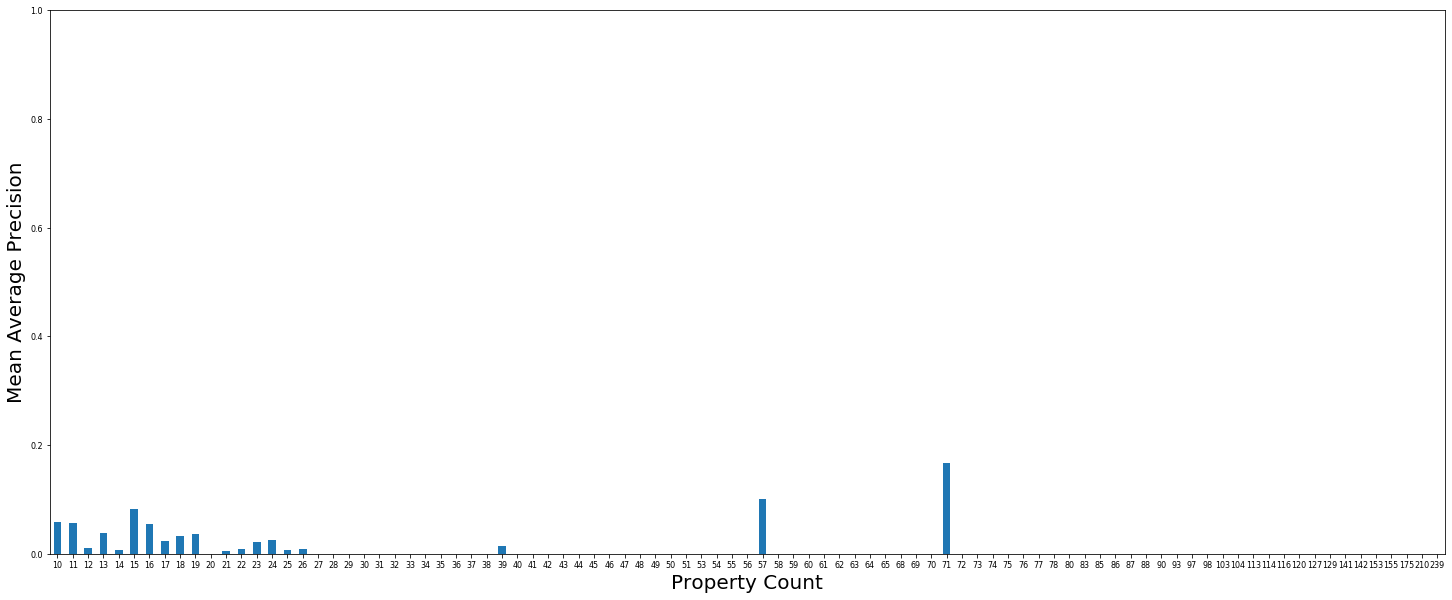

In [88]:
plt.figure(figsize=(25,10))
ip10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Jaccard 10 plus

In [89]:
jacc10_meanp = avgp_jacc_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

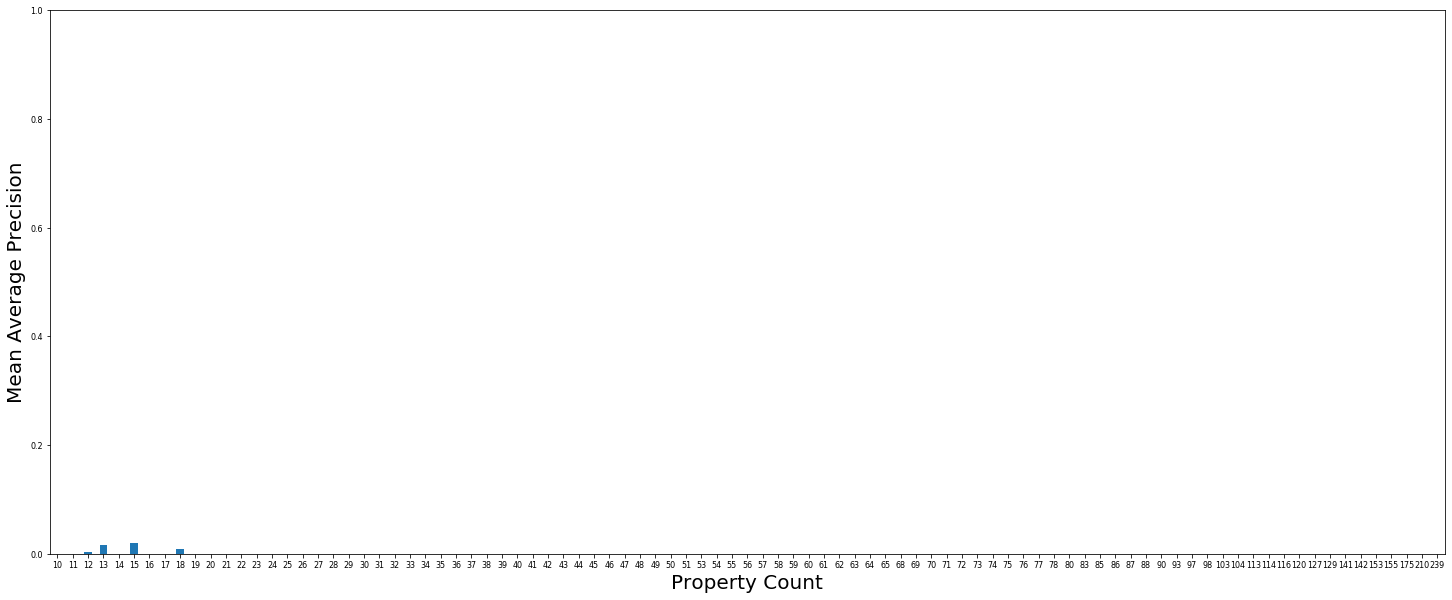

In [90]:
plt.figure(figsize=(25,10))
jacc10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Jaccard w/ weights 10 plus

In [91]:
jacc_wgt10_meanp = avgp_jacc_wgt_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

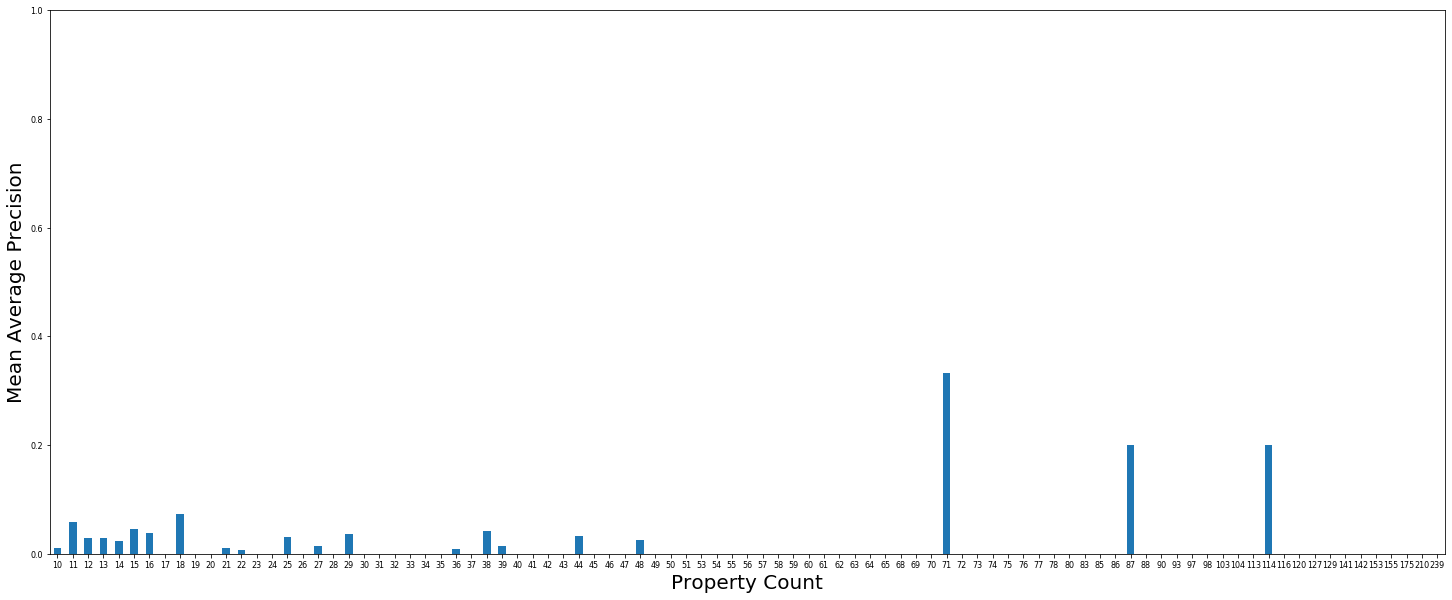

In [92]:
plt.figure(figsize=(25,10))
jacc_wgt10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Penalized Inner Product w/ weights 10 plus

In [93]:
pip_wgt10_meanp = avgp_pip_wgt_10.fillna(0).join(ep_count_10plus).groupby('count')['avg_p'].mean()

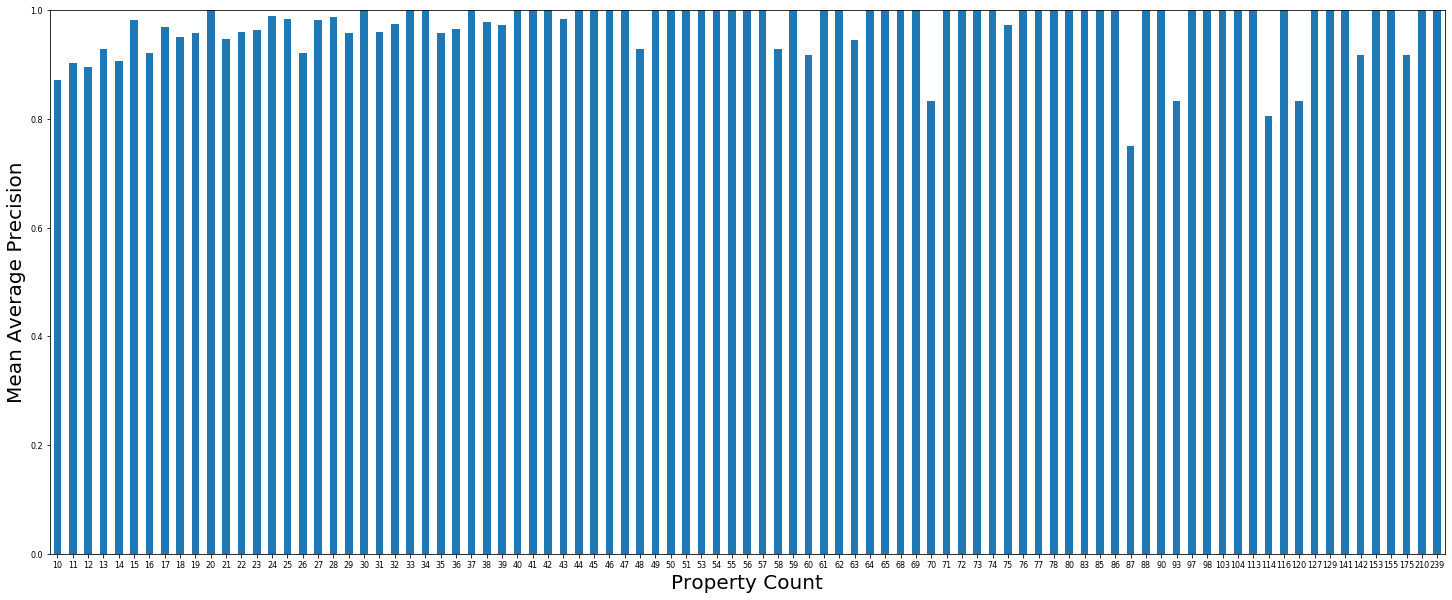

In [94]:
plt.figure(figsize=(25,10))
pip_wgt10_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

## Any property count test dataset

### Cosine

In [95]:
cosine_meanp = avgp_cosine.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

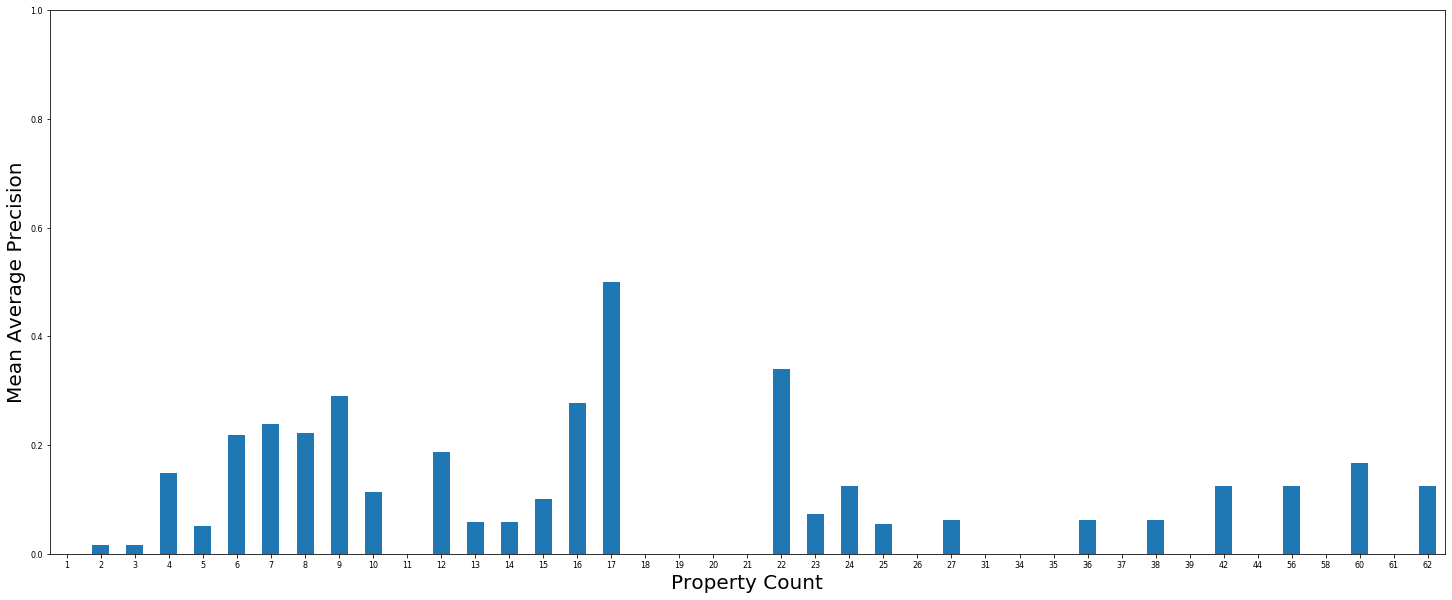

In [96]:
plt.figure(figsize=(25,10))
cosine_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [97]:
cosine_join = avgp_cosine.fillna(0).join(ep_count)
cosine_join['bin_count'] = pd.cut(cosine_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
cosinejoin_meanp = cosine_join.groupby('bin_count')['avg_p'].mean()
cosinejoin_meanp

bin_count
1-2   0.0115
3-4   0.0604
5-6   0.1096
7-8   0.2296
9+    0.1077
Name: avg_p, dtype: float64

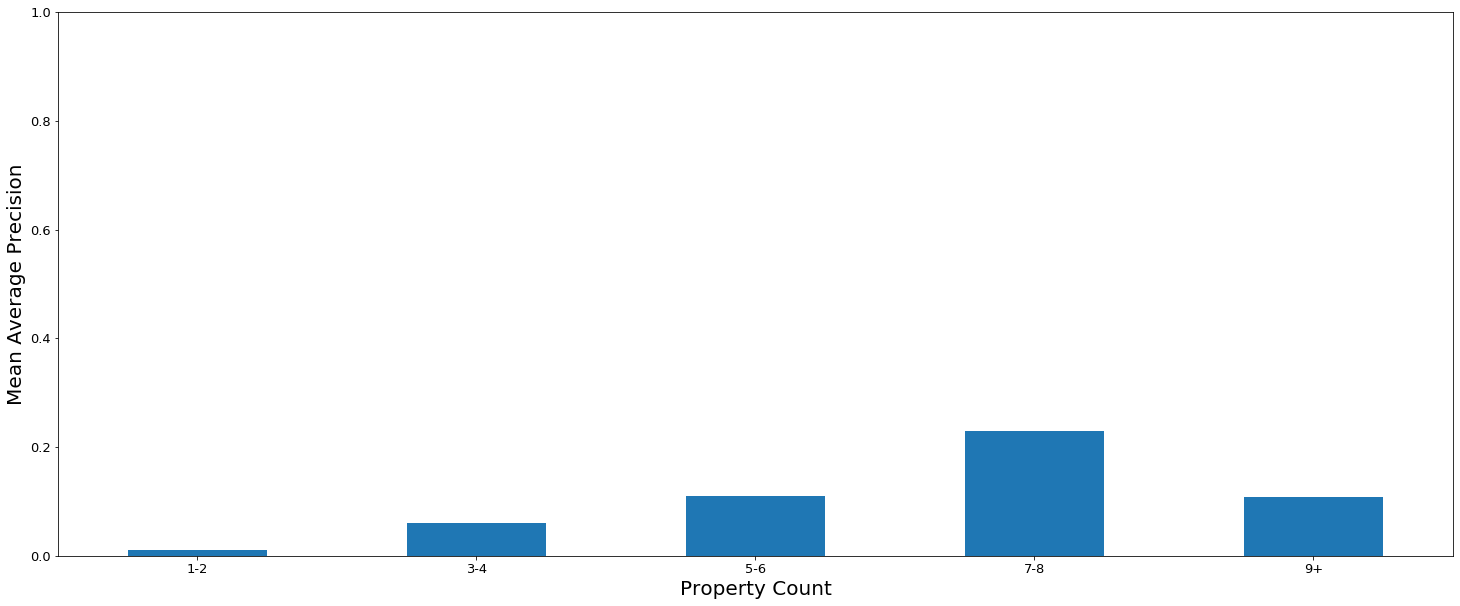

In [98]:
plt.figure(figsize=(25,10))
cosinejoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Jaccard w/ weights

In [99]:
jacc_wgt_meanp = avgp_jacc_wgt.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

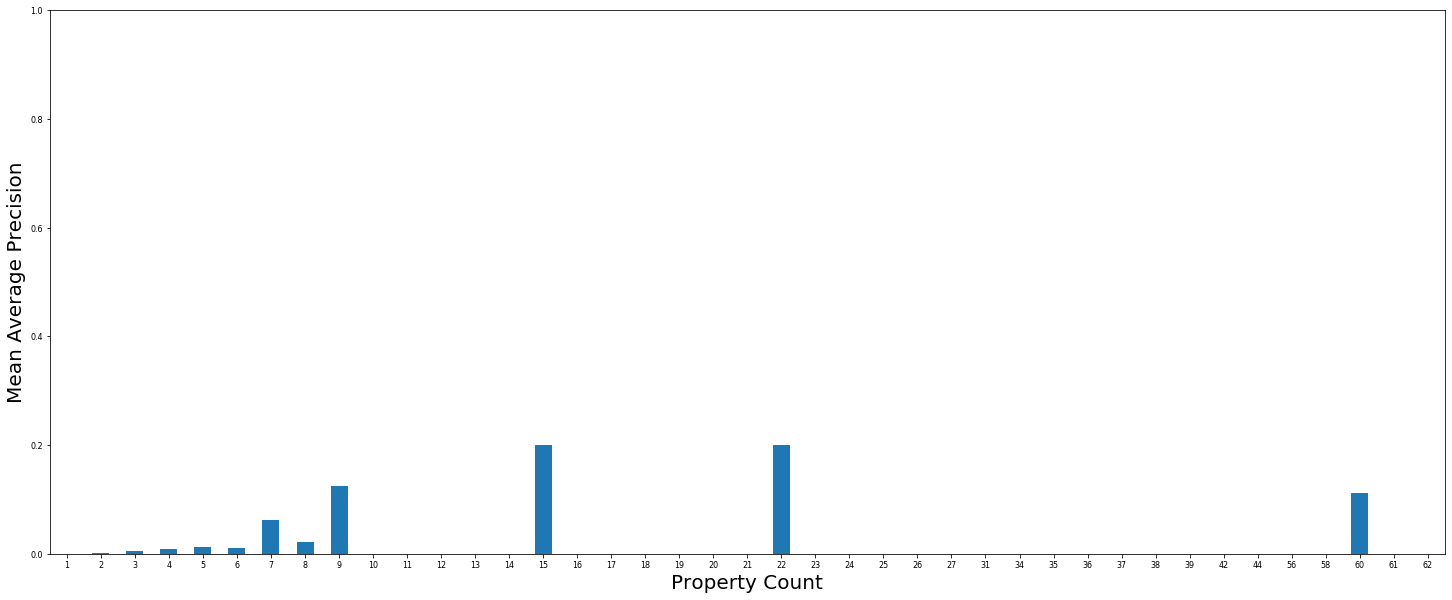

In [100]:
plt.figure(figsize=(25,10))
jacc_wgt_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [101]:
jacc_wgt_join = avgp_jacc_wgt.fillna(0).join(ep_count)
jacc_wgt_join['bin_count'] = pd.cut(jacc_wgt_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
jacc_wgtjoin_meanp = jacc_wgt_join.groupby('bin_count')['avg_p'].mean()
jacc_wgtjoin_meanp

bin_count
1-2   0.0006
3-4   0.0063
5-6   0.0127
7-8   0.0411
9+    0.0291
Name: avg_p, dtype: float64

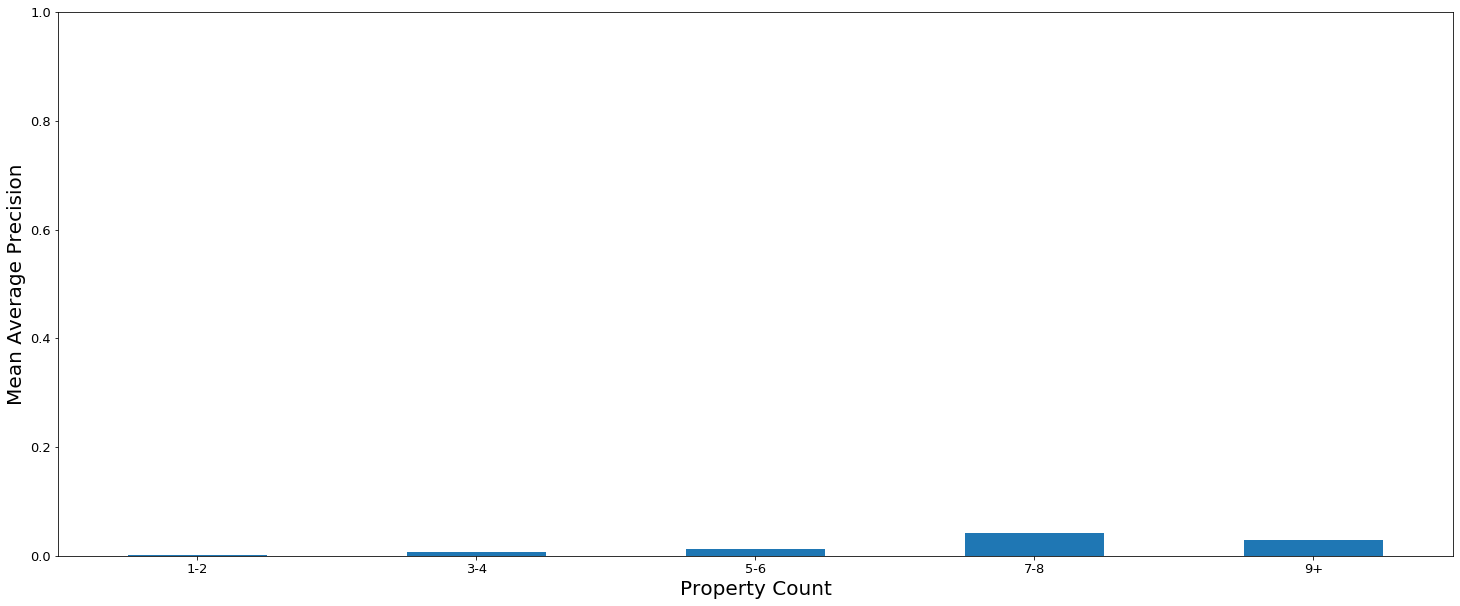

In [102]:
plt.figure(figsize=(25,10))
jacc_wgtjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Inner Product w/ weights

In [103]:
ip_wgt_meanp = avgp_ip_wgt.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

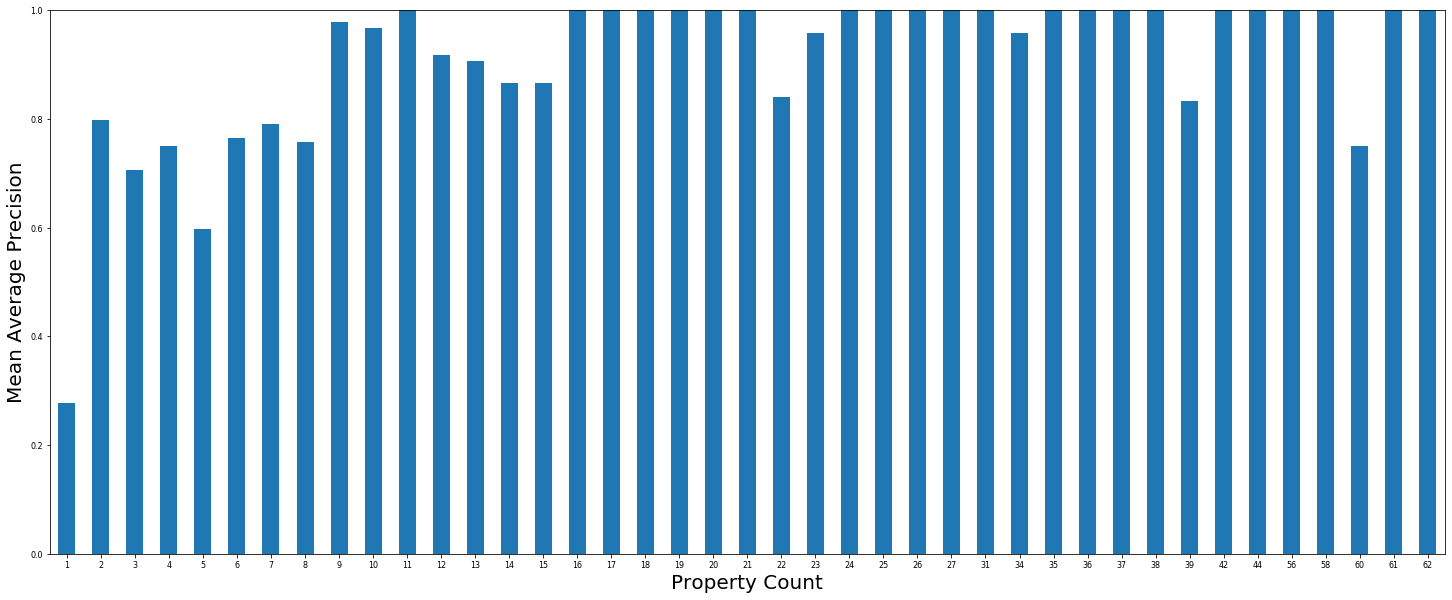

In [104]:
plt.figure(figsize=(25,10))
ip_wgt_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [105]:
ip_wgt_join = avgp_ip_wgt.fillna(0).join(ep_count)
ip_wgt_join['bin_count'] = pd.cut(ip_wgt_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
ip_wgtjoin_meanp = ip_wgt_join.groupby('bin_count')['avg_p'].mean()
ip_wgtjoin_meanp

bin_count
1-2   0.6340
3-4   0.7209
5-6   0.6552
7-8   0.7726
9+    0.9531
Name: avg_p, dtype: float64

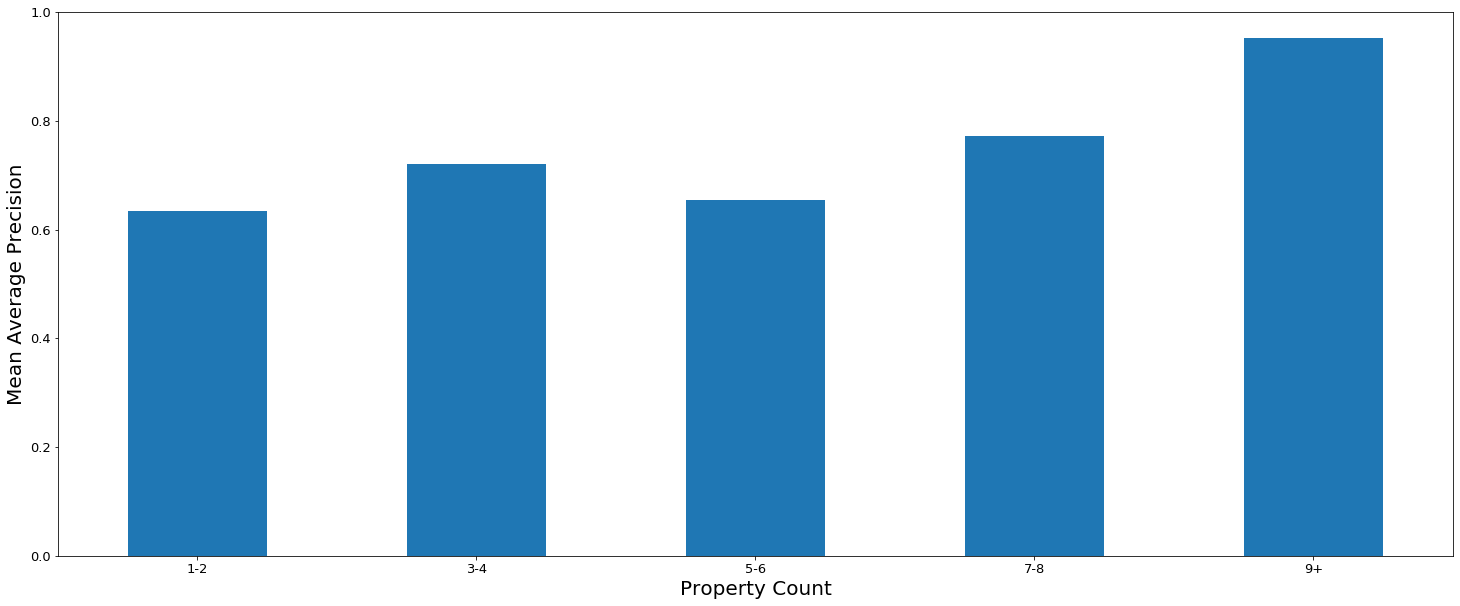

In [106]:
plt.figure(figsize=(25,10))
ip_wgtjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Jaccard

In [107]:
jacc_meanp = avgp_jacc.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

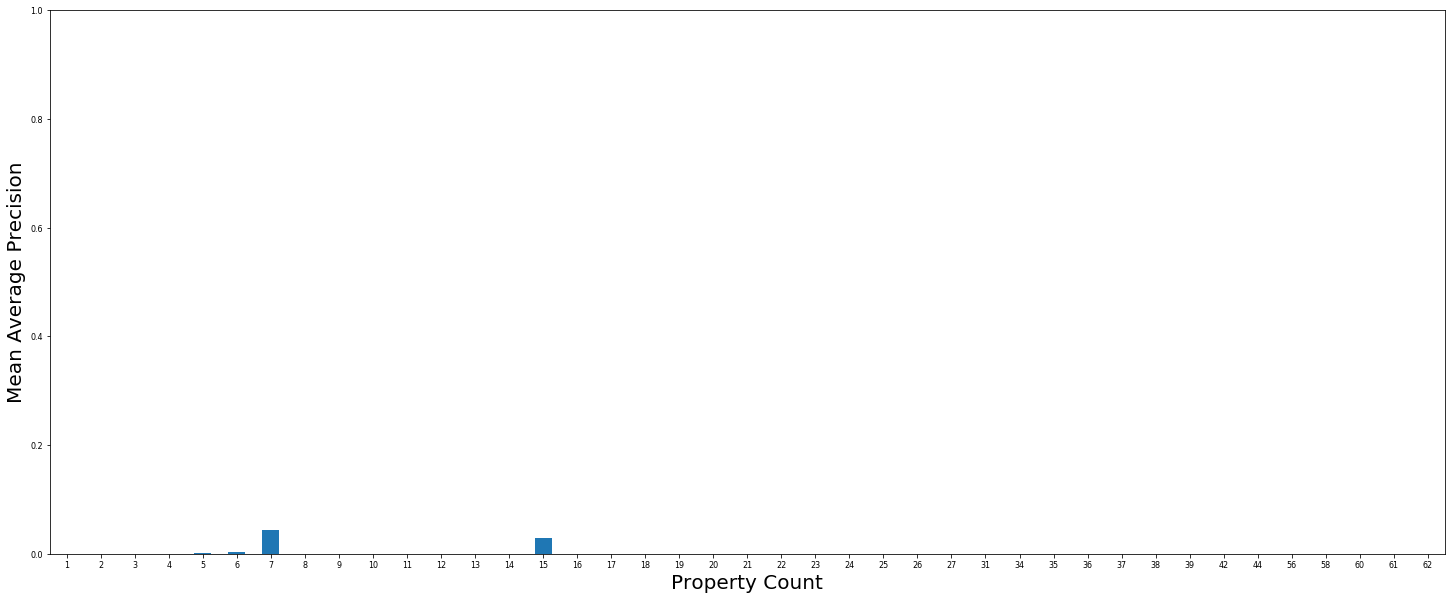

In [108]:
plt.figure(figsize=(25,10))
jacc_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [109]:
jacc_join = avgp_jacc.fillna(0).join(ep_count)
jacc_join['bin_count'] = pd.cut(jacc_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
jaccjoin_meanp = jacc_join.groupby('bin_count')['avg_p'].mean()
jaccjoin_meanp

bin_count
1-2   0.0000
3-4   0.0000
5-6   0.0019
7-8   0.0208
9+    0.0013
Name: avg_p, dtype: float64

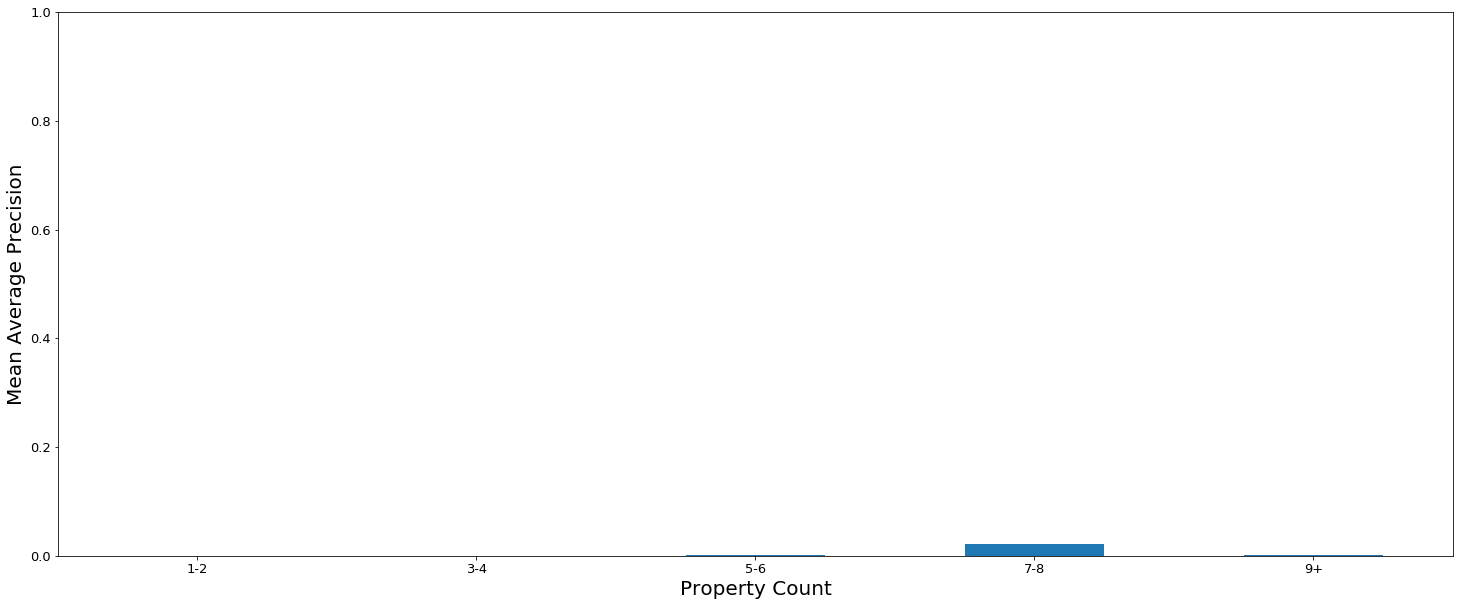

In [110]:
plt.figure(figsize=(25,10))
jaccjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Cosine w/ weights

In [111]:
cosine_wgt_meanp = avgp_cosine_wgt.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

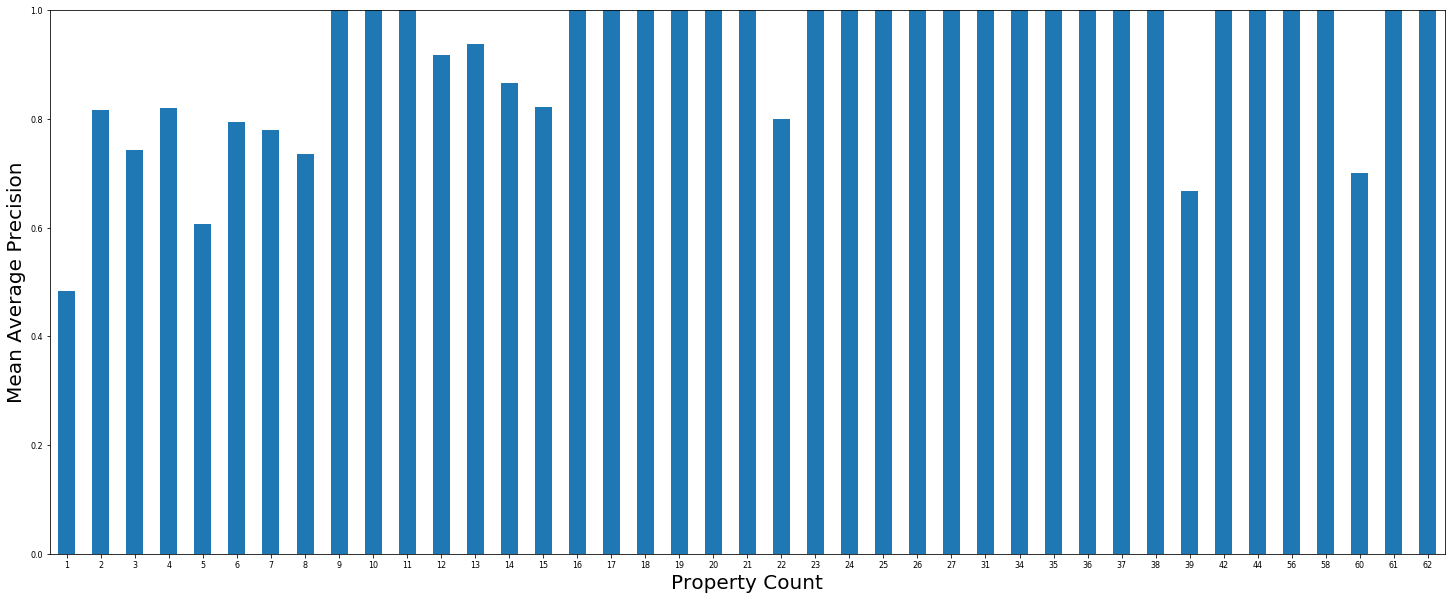

In [112]:
plt.figure(figsize=(25,10))
cosine_wgt_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [113]:
cosine_wgt_join = avgp_cosine_wgt.fillna(0).join(ep_count)
cosine_wgt_join['bin_count'] = pd.cut(cosine_wgt_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
cosine_wgtjoin_meanp = cosine_wgt_join.groupby('bin_count')['avg_p'].mean()
cosine_wgtjoin_meanp

bin_count
1-2   0.7114
3-4   0.7678
5-6   0.6716
7-8   0.7564
9+    0.9546
Name: avg_p, dtype: float64

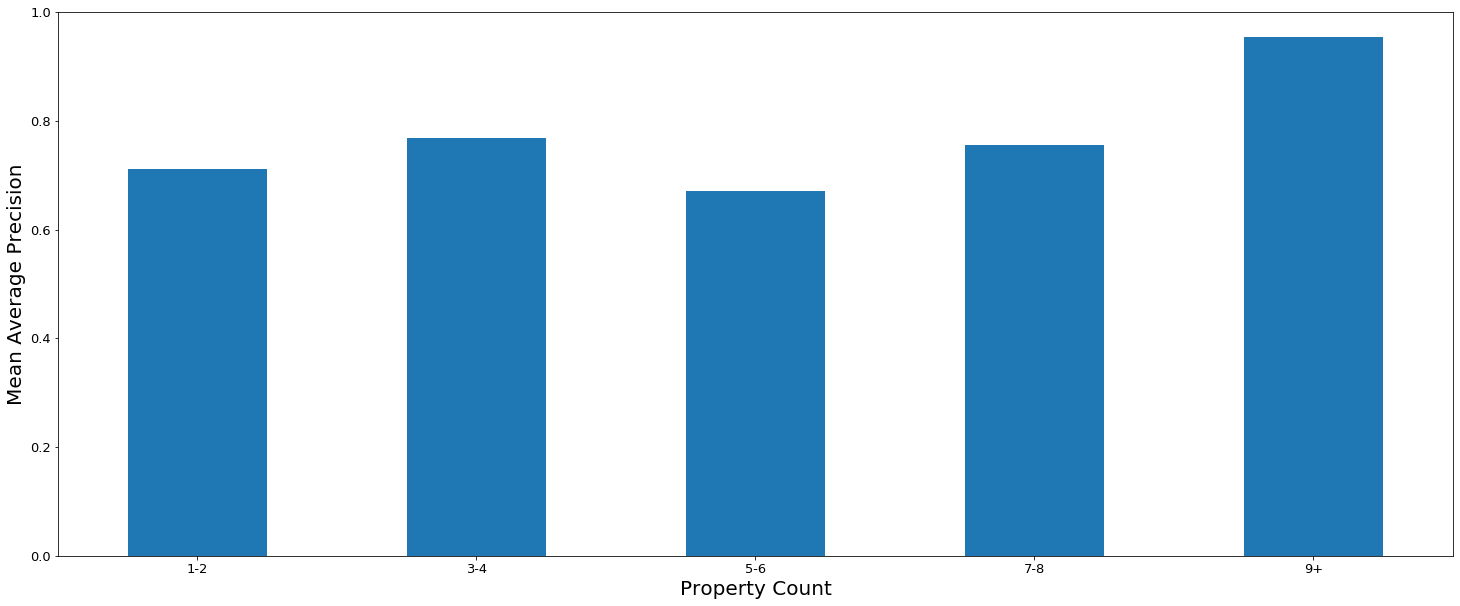

In [114]:
plt.figure(figsize=(25,10))
cosine_wgtjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Penalized Inner Product 

In [115]:
pip_meanp = avgp_pip.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

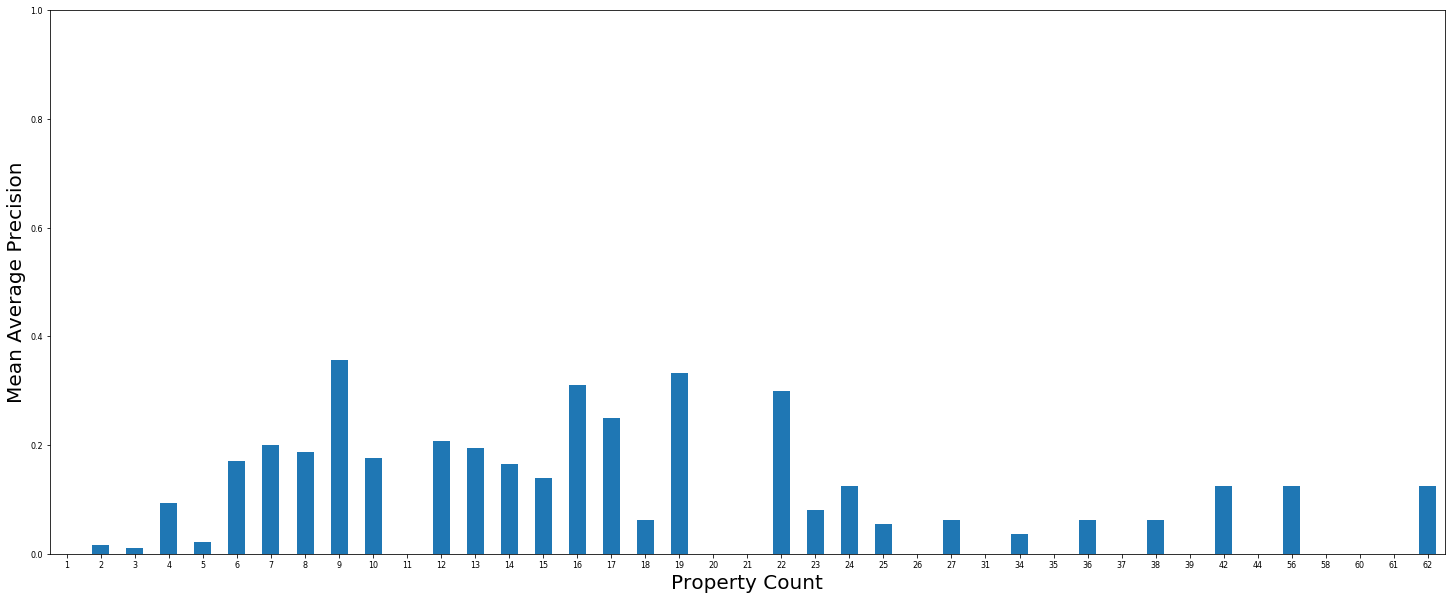

In [116]:
plt.figure(figsize=(25,10))
pip_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [117]:
pip_join = avgp_pip.fillna(0).join(ep_count)
pip_join['bin_count'] = pd.cut(pip_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
pipjoin_meanp = pip_join.groupby('bin_count')['avg_p'].mean()
pipjoin_meanp

bin_count
1-2   0.0109
3-4   0.0380
5-6   0.0733
7-8   0.1934
9+    0.1398
Name: avg_p, dtype: float64

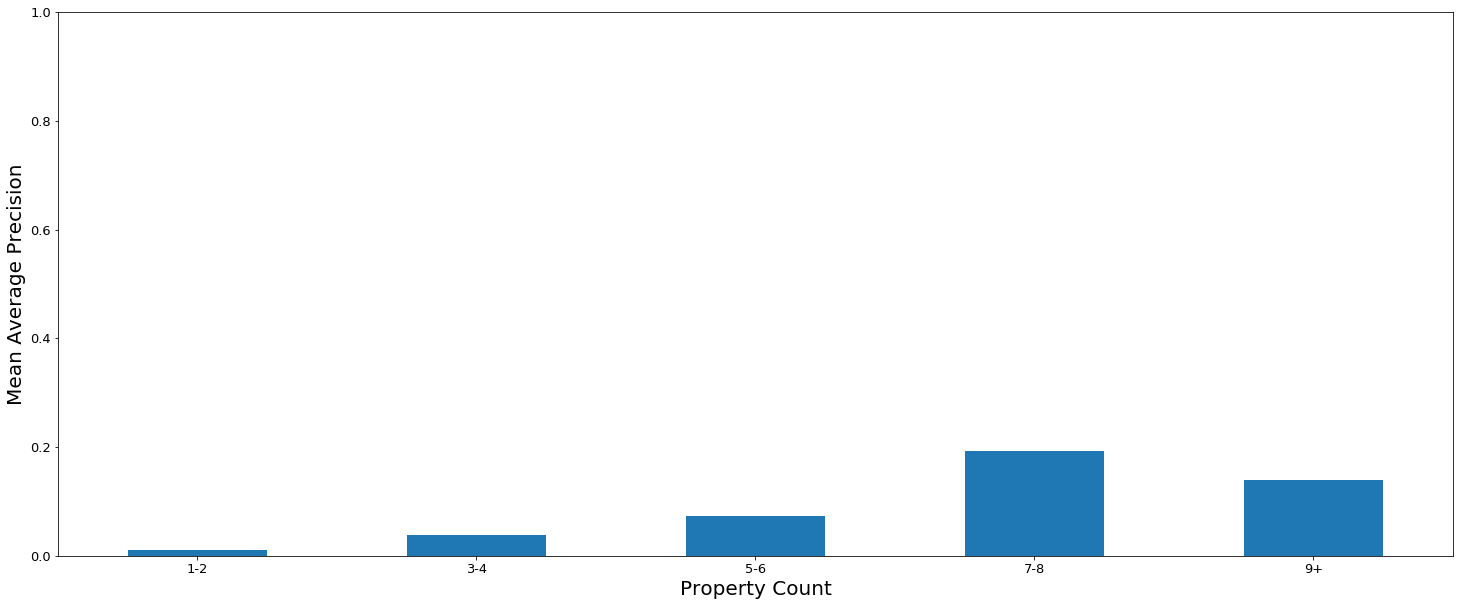

In [118]:
plt.figure(figsize=(25,10))
pipjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Penalized Inner Product w/ weights

In [119]:
pip_wgt_meanp = avgp_pip_wgt.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

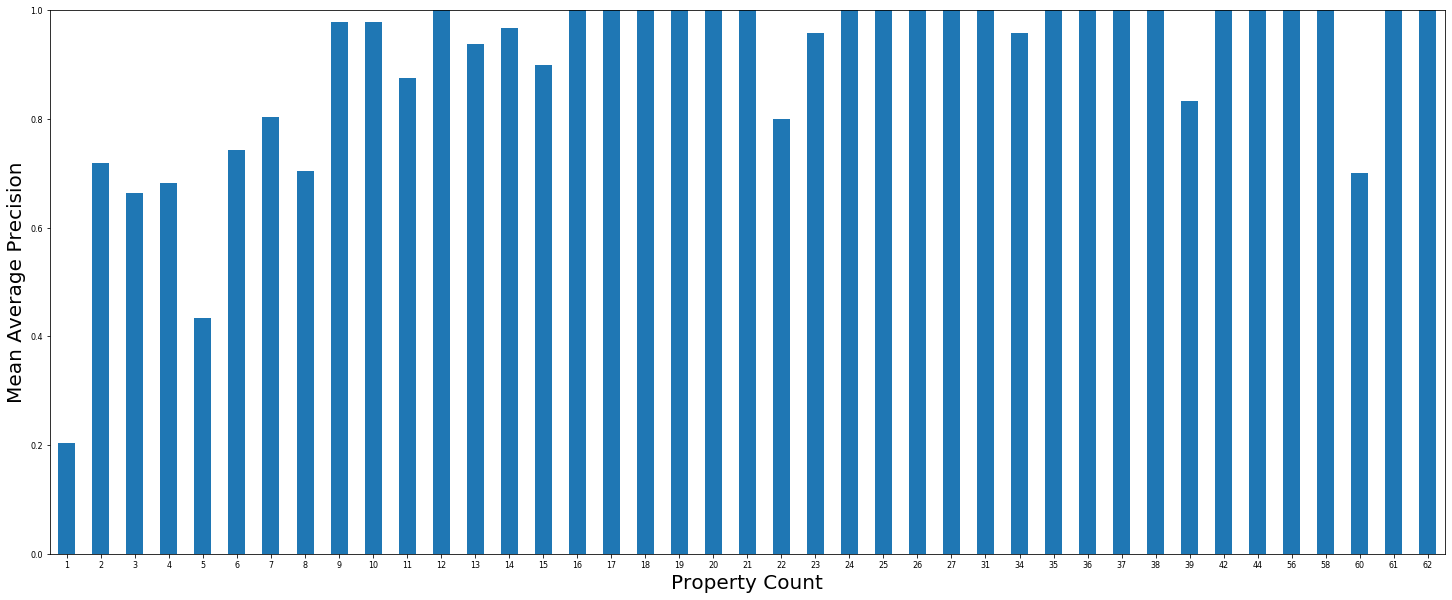

In [120]:
plt.figure(figsize=(25,10))
pip_wgt_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [121]:
pip_wgt_join = avgp_pip_wgt.fillna(0).join(ep_count)
pip_wgt_join['bin_count'] = pd.cut(pip_wgt_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
pip_wgtjoin_meanp = pip_wgt_join.groupby('bin_count')['avg_p'].mean()
pip_wgtjoin_meanp

bin_count
1-2   0.5575
3-4   0.6703
5-6   0.5412
7-8   0.7527
9+    0.9559
Name: avg_p, dtype: float64

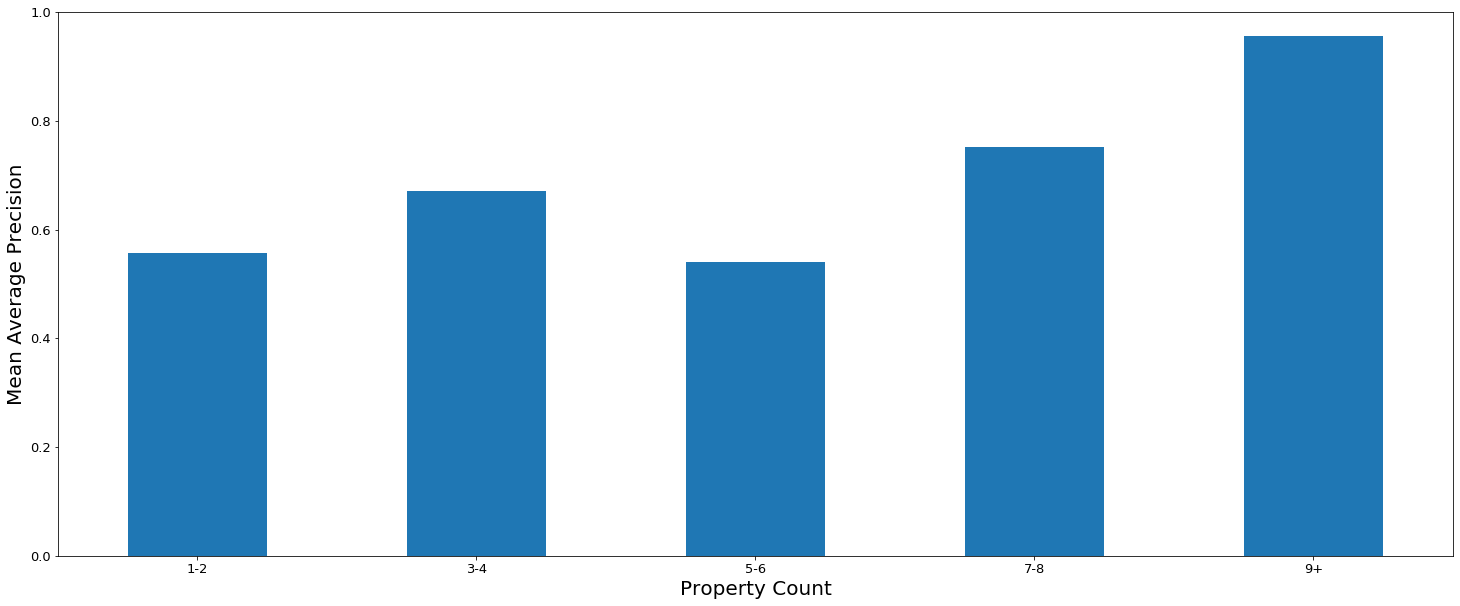

In [122]:
plt.figure(figsize=(25,10))
pip_wgtjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

### Inner Product

In [123]:
ip_meanp = avgp_ip.fillna(0).join(ep_count).groupby('count')['avg_p'].mean()

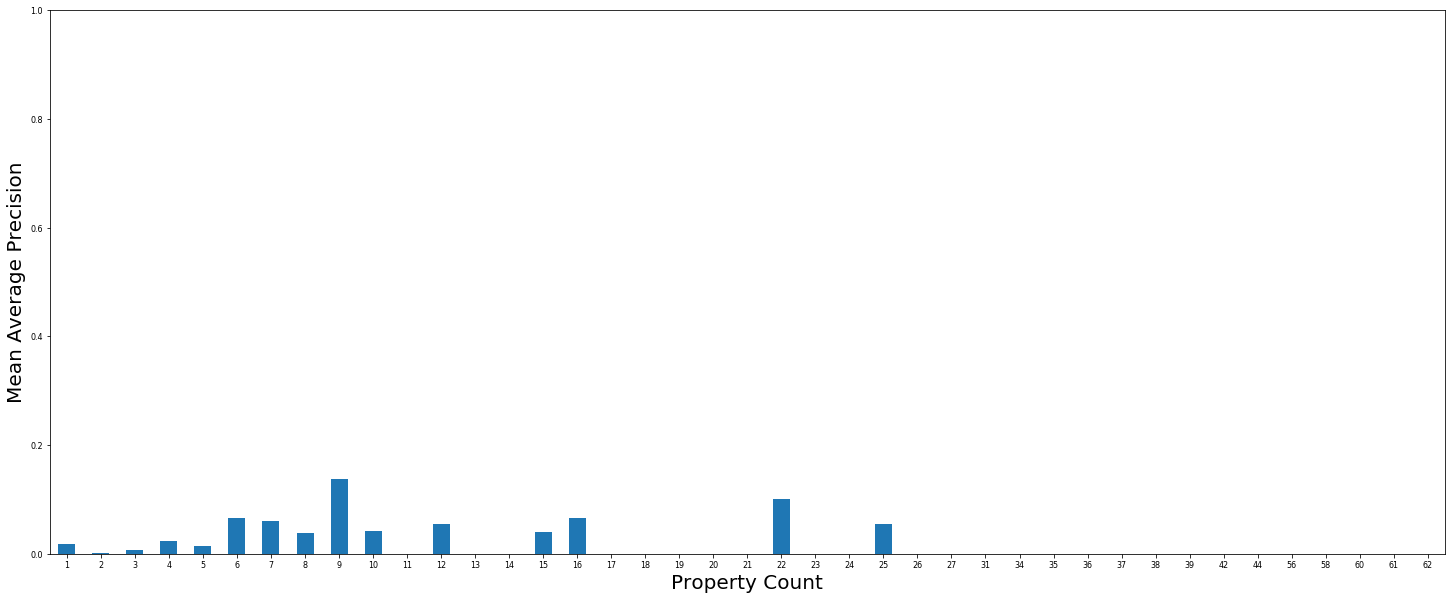

In [124]:
plt.figure(figsize=(25,10))
ip_meanp.plot.bar('index', rot=0, fontsize=8, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);

In [125]:
ip_join = avgp_ip.fillna(0).join(ep_count)
ip_join['bin_count'] = pd.cut(ip_join['count'], bins=[0, 2, 4, 6, 8, float("inf")], labels=["1-2", "3-4", "5-6", "7-8", "9+"])
ipjoin_meanp = ip_join.groupby('bin_count')['avg_p'].mean()
ipjoin_meanp

bin_count
1-2   0.0070
3-4   0.0127
5-6   0.0321
7-8   0.0491
9+    0.0294
Name: avg_p, dtype: float64

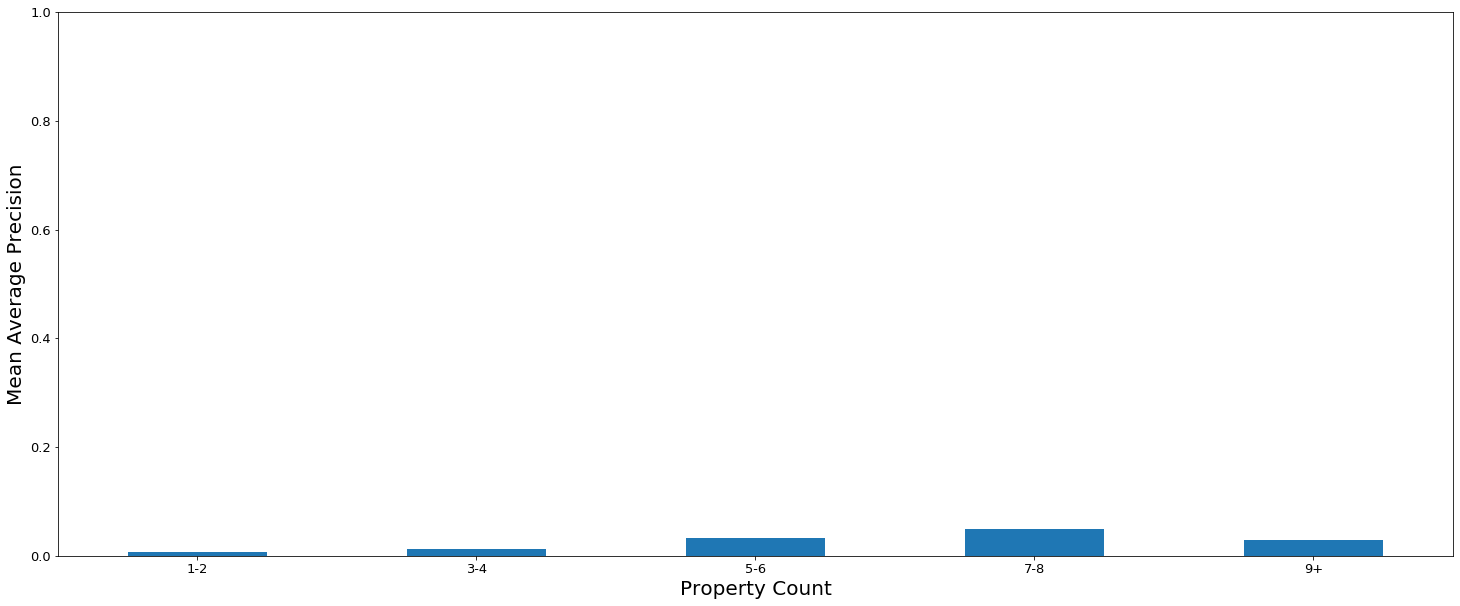

In [126]:
plt.figure(figsize=(25,10))
ipjoin_meanp.plot.bar('index', rot=0, fontsize=13, ylim=(0,1))
plt.xlabel("Property Count", fontsize=20)
plt.ylabel("Mean Average Precision", fontsize=20);